In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime
import operator

In [2]:
data=pd.read_csv('data_m.csv')
data.head()

,District,30-Jan-20,31-Jan-20,01-Feb-20,02-Feb-20,03-Feb-20,04-Feb-20,05-Feb-20,06-Feb-20,07-Feb-20,...,27-Mar-20,28-Mar-20,29-Mar-20,30-Mar-20,31-Mar-20,01-Apr-20,02-Apr-20,03-Apr-20,04-Apr-20,05-Apr-20
0,Adilabad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Agra,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,5,3,24,3
2,Ahmadabad,0,0,0,0,0,0,0,0,0,...,0,3,4,1,1,8,0,7,7,8
3,Ahmadnagar,0,0,0,0,0,0,0,0,0,...,0,0,2,0,3,0,9,0,0,3
4,Aizawl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
new_data=data.drop(columns=['District'])
new_data.head()

,30-Jan-20,31-Jan-20,01-Feb-20,02-Feb-20,03-Feb-20,04-Feb-20,05-Feb-20,06-Feb-20,07-Feb-20,08-Feb-20,...,27-Mar-20,28-Mar-20,29-Mar-20,30-Mar-20,31-Mar-20,01-Apr-20,02-Apr-20,03-Apr-20,04-Apr-20,05-Apr-20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,5,3,24,3
2,0,0,0,0,0,0,0,0,0,0,...,0,3,4,1,1,8,0,7,7,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,3,0,9,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
array=np.array(new_data)
array

array([[ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  3, 24,  3],
       [ 0,  0,  0, ...,  7,  7,  8],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  1,  4,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [13]:
array.shape

(285, 67)

In [52]:
X=array[:,:66]
X.shape

(285, 66)

In [53]:
X[:,65]

array([ 0, 24,  7,  0,  0,  0,  1,  0,  0,  1,  3,  1,  0,  0,  0,  0,  0,
        1,  1,  1,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  4,  1,  0,  0,
        1,  2,  2,  1,  2,  7,  0,  2,  0,  0,  0,  0,  1,  0,  0,  7,  1,
        0,  0,  1,  0,  2,  0,  3,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  8,  1,  0,  2,  8,  0,  4,  2,  0,  0,  1,  0,
        0,  0, 10,  2,  0,  0,  0,  1,  4,  0,  1,  0,  0,  0,  0,  0,  0,
        0, 14,  0,  0,  0,  0,  1,  1,  0,  0,  0,  7,  7,  0,  0,  1,  0,
        1,  0,  2,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  2,  6,  0,  3,
        0,  0,  0,  0,  1,  1,  0,  0,  5,  3,  1,  0,  0,  0,  0,  0,  2,
        6,  0,  0,  0,  3,  0,  0,  0,  2,  0,  0,  0,  0, 28,  0,  7,  0,
        0,  0,  0,  5,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  1,  0, 13,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  0,
        0,  4,  1,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0, 18,  0,  0,
        1,  2,  0,  1,  1

In [54]:
Y=array[:,66]
Y.shape

(285,)

In [55]:
Y

array([ 1,  3,  8,  3,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  0,  0,  0,
        0,  1,  1,  0,  0,  1,  0,  0,  1,  3,  0,  0,  4,  2,  0,  0,  0,
        0,  0,  4,  0,  0,  3,  0,  6,  0,  1,  0,  0,  0,  0,  3,  7,  0,
        0,  0,  7,  1,  0, 29,  7,  0,  0,  2,  0,  0,  0,  0,  2,  0,  0,
        0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  9,  2,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0, 51,  0,
        0,  7,  0, 39,  1,  0,  0,  0,  0,  1,  0,  1,  3,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  1,  1,  8,  0,  0,  0,  0,  1,  0,  1,
       18,  0,  0,  0,  0,  0,  0,  5,  0, 49,  3,  0,  0,  0,  7,  1,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0, 29,  0,  0,  0,
        6,  1,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,
        0,  2,  0,  0, 21,  0,  2,  0,  0,  0,  0,  0,  0,  1,  2,  0,  0,
        0,  1,  2,  0,  3

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
X_train.shape

(213, 66)

In [59]:
Y_train.shape

(213,)

In [60]:
X_test.shape

(72, 66)

In [61]:
Y_test.shape

(72,)

In [110]:
from sklearn import svm

In [122]:
kernel=['poly','sigmoid','rbf']
c=[0.01,0.1,1,10]
gamma=[0.01,0.1,1]
#epsilon=[0.01,0.1,1]
shrinking=[True,False]
svm_grid={'kernel':kernel,'C':c,'gamma':gamma,'shrinking':shrinking}

In [123]:
svm=SVC()
svm_search=RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_iter=100,verbose=1)
svm_search.fit(X_train,Y_train)

C:\Users\guppr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\guppr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    1.3s finished
C:\Users\guppr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=100, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [124]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'sigmoid', 'gamma': 0.01, 'C': 10}

In [125]:
svm_confirmed=svm_search.best_estimator_
svm_pred=svm_confirmed.predict(X_test)

In [126]:
svm_confirmed

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [127]:
svm_pred

array([ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  7,
       29,  2,  0,  0], dtype=int64)

In [138]:
svm_pred.shape

(72,)

In [128]:
svm_confirmed.score(X_test,Y_test)

0.7638888888888888

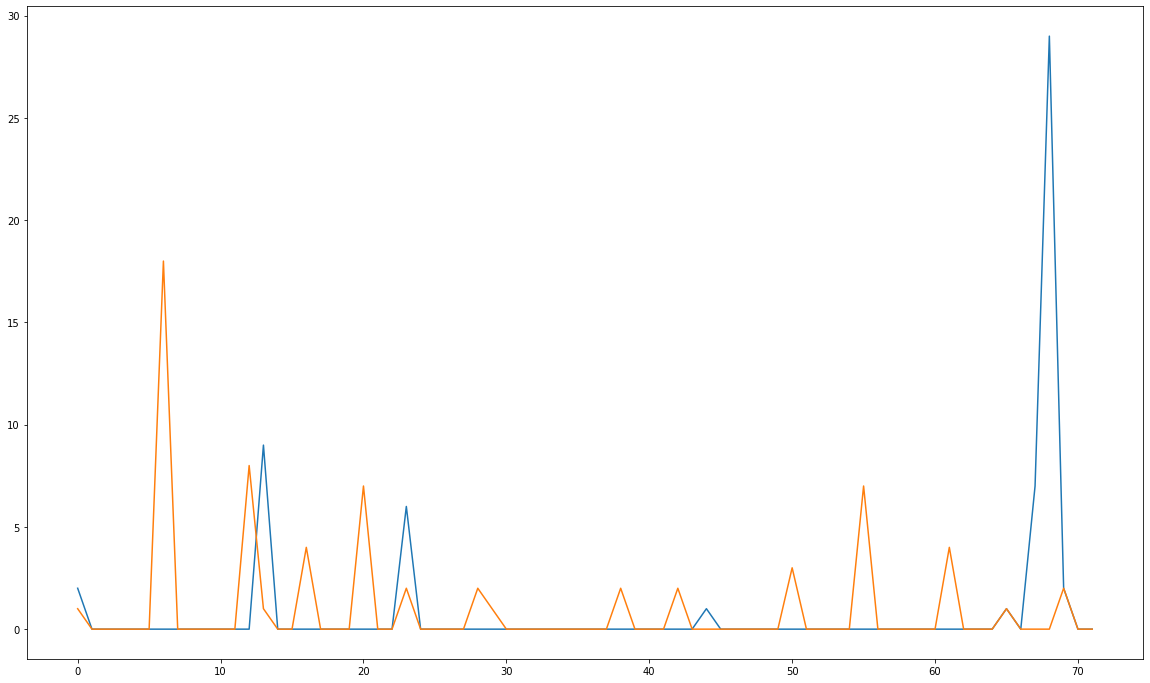

In [131]:
plt.figure(figsize=(20,12))
plt.plot(svm_pred)
plt.plot(Y_test)

In [132]:
from sklearn.ensemble import RandomForestRegressor 

In [222]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

In [224]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [225]:
regressor.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.12959348e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.85606600e-03, 4.70829128e-02, 1.03380476e-03, 6.40035218e-03,
       4.10061786e-06, 4.49372954e-05, 0.00000000e+00, 1.63578384e-03,
       4.45563499e-03, 1.42474520e-02, 4.84073661e-03, 3.76342689e-03,
       1.33690166e-01, 2.94196465e-04, 8.77717638e-03, 7.13544844e-04,
       3.19289005e-02, 1.30871440e-01, 2.13131911e-02, 6.67879212e-02,
       8.13257757e-02, 8.35788240e-03, 1.51633299e-03, 2.82660977e-03,
      

In [226]:
y_pred = regressor.predict(X_test)
y_pred.shape

(72,)

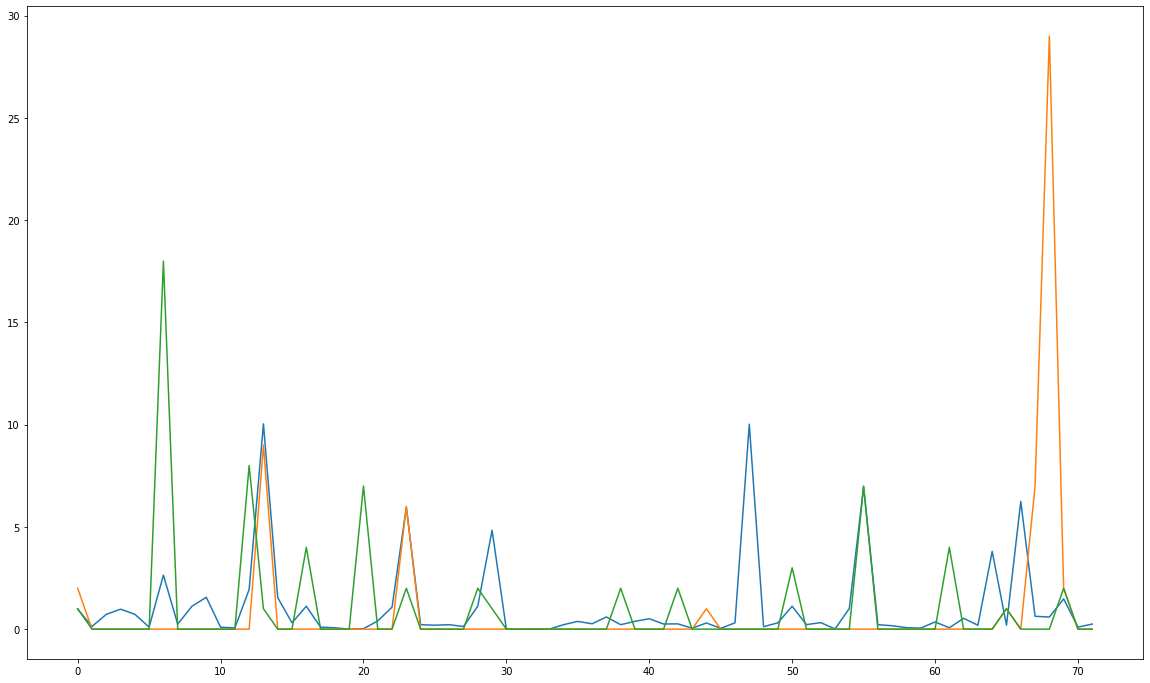

In [227]:
plt.figure(figsize=(20,12))
plt.plot(y_pred)
plt.plot(svm_pred)
plt.plot(Y_test)

In [228]:
regressor.score(X_test,Y_test)

-0.2922467248870817